In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d noulam/tomato

 99% 738M/743M [00:04<00:00, 228MB/s]
100% 743M/743M [00:04<00:00, 165MB/s]


In [ ]:
!unzip tomato.zip


Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac022a2b-764c-4507-8dd9-4470b75763e4___RS_HL 9937.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac249839-fe21-45cd-9e09-f0023fa7ee3a___GH_HL Leaf 273.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdbf632-8d26-472d-874f-6d7df5cd0432___RS_HL 9897.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdf2283-0e7c-4ccd-8817-1019e3a8ed20___RS_HL 9943.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acf28842-7821-4f31-ab73-2787e332e852___RS_HL 0011.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___h

In [ ]:
import tensorflow as tf
import pandas as pd
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
from keras.applications.resnet import ResNet50
resnet=ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

for layer in resnet.layers:
  layer.trainable=False

In [ ]:
folders = glob('/content/New Plant Diseases Dataset(Augmented)/train/*')
folders

['/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy']

In [ ]:
x = Flatten()(inception.output)
prediction0 = Dense(len(folders), activation='softmax')(x)

In [ ]:
x1=Flatten()(resnet.output)
prediction1=Dense(len(folders),activation='softmax')(x1)

In [ ]:
model0 = Model(inputs=inception.input, outputs=prediction0)
model0.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

In [ ]:
print(inception.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")


In [ ]:
print(resnet.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'")


In [ ]:
model1 = Model(inputs=resnet.input, outputs=prediction1)
model1.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
model0.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
model1.compile(
      loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/valid',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [ ]:
r0 = model0.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-55-007d138cc582>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r0 = model0.fit_generator(


Epoch 1/10
574/574 [==============================] - 321s 543ms/step - loss: 2.8620 - accuracy: 0.6771 - val_loss: 2.8063 - val_accuracy: 0.7256
Epoch 2/10
574/574 [==============================] - 283s 494ms/step - loss: 2.2399 - accuracy: 0.7858 - val_loss: 2.5620 - val_accuracy: 0.7804
Epoch 3/10
574/574 [==============================] - 284s 495ms/step - loss: 2.0780 - accuracy: 0.8195 - val_loss: 1.9896 - val_accuracy: 0.8257
Epoch 4/10
574/574 [==============================] - 295s 514ms/step - loss: 1.8224 - accuracy: 0.8473 - val_loss: 2.5315 - val_accuracy: 0.8172
Epoch 5/10
574/574 [==============================] - 289s 503ms/step - loss: 1.8011 - accuracy: 0.8540 - val_loss: 3.1512 - val_accuracy: 0.8120
Epoch 6/10
574/574 [==============================] - 315s 548ms/step - loss: 1.9135 - accuracy: 0.8599 - val_loss: 2.5820 - val_accuracy: 0.8421
Epoch 7/10
574/574 [==============================] - 288s 501ms/step - loss: 1.7884 - accuracy: 0.8750 - val_loss: 4.6927 -

In [ ]:
r1 = model0.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-56-9c36d6dcfa90>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r1 = model0.fit_generator(


Epoch 1/10
574/574 [==============================] - 280s 488ms/step - loss: 1.7000 - accuracy: 0.8916 - val_loss: 3.3142 - val_accuracy: 0.8399
Epoch 2/10
574/574 [==============================] - 283s 493ms/step - loss: 1.6272 - accuracy: 0.8981 - val_loss: 2.3733 - val_accuracy: 0.8678
Epoch 3/10
574/574 [==============================] - 280s 488ms/step - loss: 1.3169 - accuracy: 0.9104 - val_loss: 2.9762 - val_accuracy: 0.8530
Epoch 4/10
574/574 [==============================] - 287s 501ms/step - loss: 1.4308 - accuracy: 0.9117 - val_loss: 3.1309 - val_accuracy: 0.8495
Epoch 5/10
574/574 [==============================] - 294s 513ms/step - loss: 1.6480 - accuracy: 0.9045 - val_loss: 2.3780 - val_accuracy: 0.8809
Epoch 6/10
574/574 [==============================] - 279s 485ms/step - loss: 1.4860 - accuracy: 0.9136 - val_loss: 2.3521 - val_accuracy: 0.8816
Epoch 7/10
574/574 [==============================] - 282s 491ms/step - loss: 1.5318 - accuracy: 0.9105 - val_loss: 3.0990 -

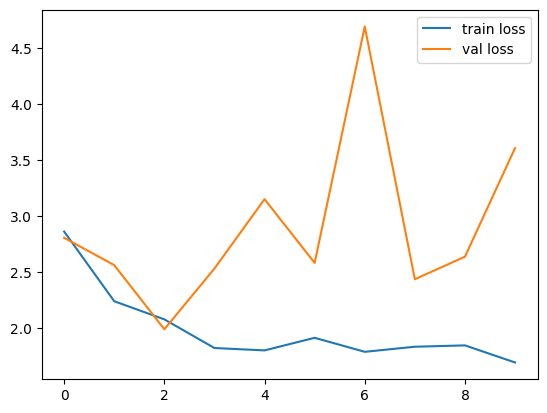

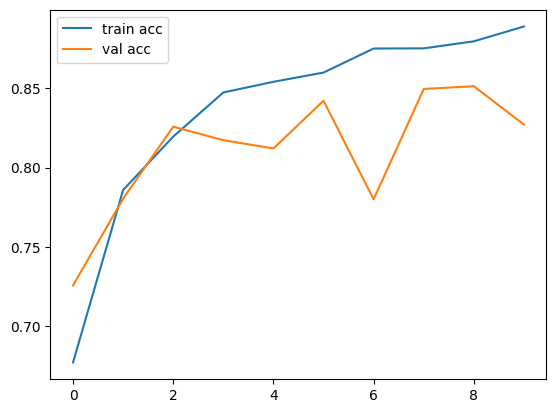

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r0.history['loss'], label='train loss')
plt.plot(r0.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r0.history['accuracy'], label='train acc')
plt.plot(r0.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

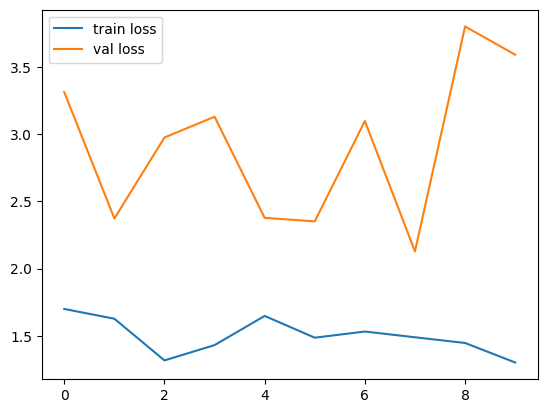

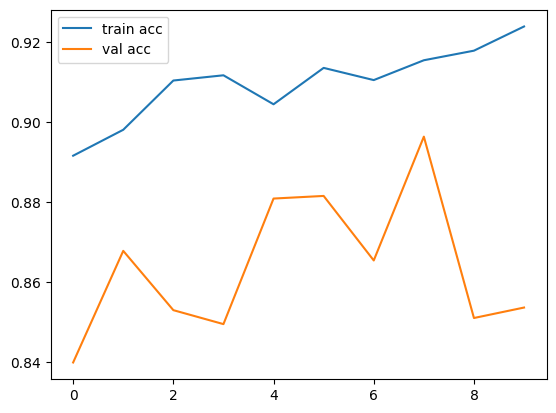

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model
model0.save('model_inception.h5')
model1.save('model_resnet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Load the data
X = np.loadtxt("data.csv", delimiter=",")
y = np.loadtxt("labels.csv", delimiter=",")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the model

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import load_model

In [ ]:

model0=load_model('model_inception.h5')
model1=load_model('model_resnet50.h5')

OSError: Unable to open file (truncated file: eof = 83886080, sblock->base_addr = 0, stored_eof = 94267472)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/image.jpg'

# Load and resize the image
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to a NumPy array
x = image.img_to_array(img)

# Ensure the data type is float32
x = x.astype('float32')

# Scale the pixel values to [0, 1]
x /= 255.0

# Check the shape of the preprocessed image
print("Shape of preprocessed image:", x.shape)

# Check the expected input shape of the model
print("Expected input shape of the model:", model0.input_shape)

# Make predictions using the model
y_pred0 = model0.predict(np.expand_dims(x, axis=0))  # Add an extra dimension to match model input shape

#y_pred0=np.argmax(y_pred0, axis=1)
print(y_pred0)

Shape of preprocessed image: (224, 224, 3)
Expected input shape of the model: (None, 224, 224, 3)
1/1 [==============================] - 0s 26ms/step
[[0.0000000e+00 6.1968166e-01 3.8031831e-01 0.0000000e+00 3.8586745e-14
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [ ]:
X_test_first_10, y_true_first_10

(array([[[[0.6984849 , 0.6396613 , 0.61221033],
          [0.6693141 , 0.61049056, 0.5830396 ],
          [0.65225965, 0.5934361 , 0.56598514],
          ...,
          [0.7691349 , 0.7299192 , 0.6946251 ],
          [0.7577654 , 0.7185497 , 0.6832556 ],
          [0.7758477 , 0.736632  , 0.7013379 ]],
 
         [[0.6904196 , 0.6315961 , 0.6041451 ],
          [0.668158  , 0.60933447, 0.5818835 ],
          [0.65255564, 0.59373206, 0.5662811 ],
          ...,
          [0.76811445, 0.72889876, 0.69360465],
          [0.7479892 , 0.7087735 , 0.6734794 ],
          [0.78227675, 0.74306107, 0.70776695]],
 
         [[0.68148166, 0.62265813, 0.59520715],
          [0.6793303 , 0.62050676, 0.5930558 ],
          [0.6757399 , 0.61691636, 0.5894654 ],
          ...,
          [0.77831584, 0.73910016, 0.70380604],
          [0.74576366, 0.706548  , 0.67125386],
          [0.7613567 , 0.722141  , 0.6868469 ]],
 
         ...,
 
         [[0.64097464, 0.5547001 , 0.5115628 ],
          [0.58746

1/1 [==============================] - 2s 2s/step
Confusion Matrix:
[[4 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0]
 [0 2 1 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 1 0 2 0]
 [0 0 0 0 0 0 0 0 0 4]]


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (32).

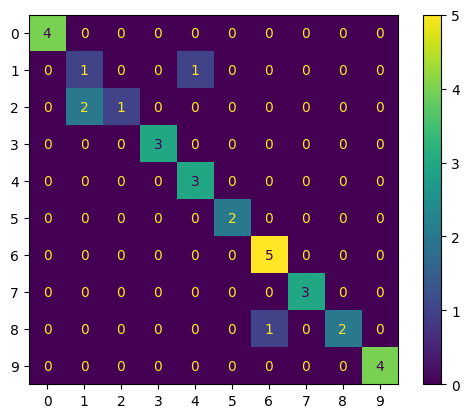

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf

# Load your pre-trained H5 model
model = tf.keras.models.load_model('model_inception.h5')

# Load your test data
#X_test_first_10 = test_set[:10] # Your test data
#y_true_first_10 = folders # True labels for the test data

X_test_first_10, y_true_first_10 = next(test_set)

import numpy as np
y_true_first_10=np.argmax(y_true_first_10, axis=1)



# Make predictions
y_pred = model.predict(X_test_first_10)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_first_10, y_pred_classes)

print("Confusion Matrix:")
print(cm)

import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=y_pred_classes)
disp.plot()
plt.show()

1/1 [==============================] - 1s 868ms/step
Confusion Matrix:
[[0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 6 0 0]]


ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (32).

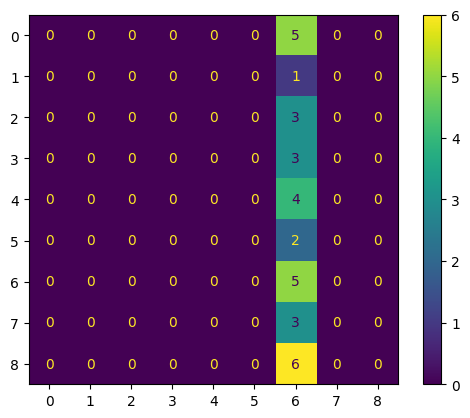

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf

# Load your pre-trained H5 model
model = tf.keras.models.load_model('model_resnet50.h5')

# Load your test data
#X_test_first_10 = test_set[:10] # Your test data
#y_true_first_10 = folders # True labels for the test data

X_test_first_10, y_true_first_10 = next(test_set)

import numpy as np
y_true_first_10=np.argmax(y_true_first_10, axis=1)



# Make predictions
y_pred = model.predict(X_test_first_10)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_first_10, y_pred_classes)

print("Confusion Matrix:")
print(cm)

import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=y_pred_classes)
disp.plot()
plt.show()